# Fashion MNIST 모델 실습

## 데이터 로드

In [2]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

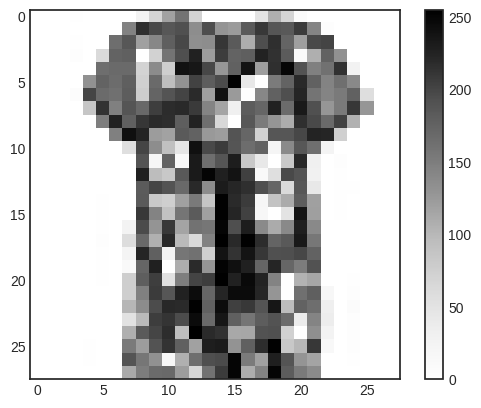

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

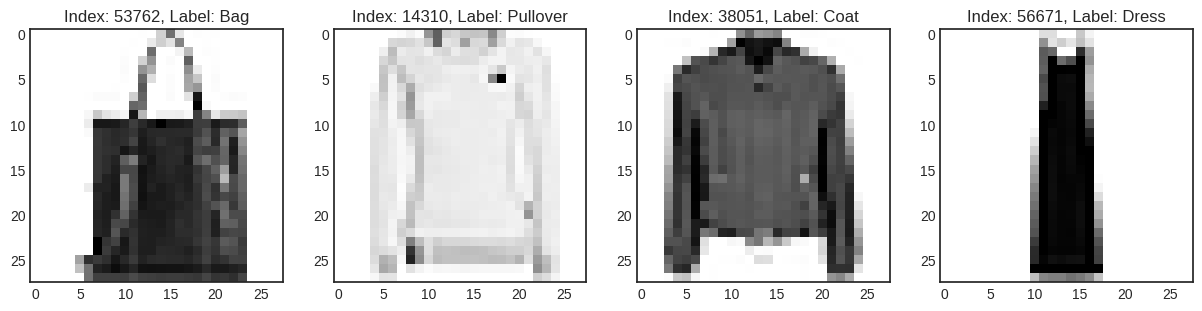

In [15]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

## 데이터 전처리

In [9]:
# 데이터 크기 확인
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [5]:
# 2차원 -> 1차원 flatten 을 위해 reshape 이용. 28*28 = 784
# flatten 레이어 사용 가능.
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [11]:
# 결과 확인
print(x_train[0])
# 0~ 255 숫자 구성 -> 전처리로 숫자 범위 줄여주기

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [6]:
# 숫자 범위 줄여주기
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [7]:
#결과 확인
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

## 모델 구성

- Sequential() API
- 레이어 순서
  1. Input = 전처리 완료한 784개 형태
  2. Dense = 유닛수512, 활성화 함수sigmoid
  3. Dense = 유닛수10(분류 갯수), 활성화함수 softmax


In [8]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## 모델 컴파일 및 학습
- 옵티마이져 = SGD
- 손실함수 = sparse_categorical_corssentropy (다중분류에 레이블이 정수)
- 지표 = accuracy

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [10]:
# 학습용 데이터셋 : x_train, y_train
# 검증 데이터셋 : x_val, y_val
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.2588 - loss: 2.2582 - val_accuracy: 0.4311 - val_loss: 2.0149
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5652 - loss: 1.9520 - val_accuracy: 0.6168 - val_loss: 1.7906
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6276 - loss: 1.7446 - val_accuracy: 0.6652 - val_loss: 1.6143
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.6661 - loss: 1.5765 - val_accuracy: 0.6171 - val_loss: 1.4806
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.6627 - loss: 1.4463 - val_accuracy: 0.6772 - val_loss: 1.3635
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.6880 - loss: 1.3404 - val_accuracy: 0.6968 - val_loss: 1.2761
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6993 - loss: 1.2565 - val_accuracy: 0.6959 - val_loss: 1.2020
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7050 - loss: 1.1827 - val_accuracy: 0.6858 - v

In [11]:
# show_history: 학습 결과 시각화(history) 함수 정의
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

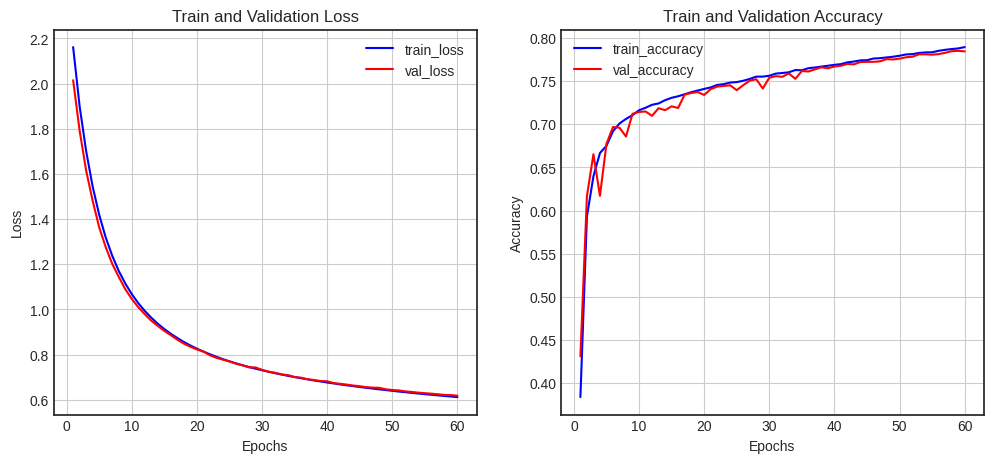

In [12]:
#기본 학습 결과 시각화
show_history(history) # 베이스라인

## 모델 평가 및 예측

In [13]:
# 테스트 데이터 셋 : x_test, y_test
# 모델 평가 - 1차
model.evaluate(x_test, y_test)
# 베이스라인 결과 : accuracy: 0.7872 - loss: 0.6217

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7814 - loss: 0.6261


[0.6308466792106628, 0.7767000198364258]

In [16]:
# 1차 예측
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.3381853e-02 9.3879545e-01 3.6667990e-03 1.2967255e-02 2.3948928e-02
 4.0053852e-05 6.9952961e-03 3.2118158e-05 1.5989684e-04 1.2393180e-05]
1
Trouser


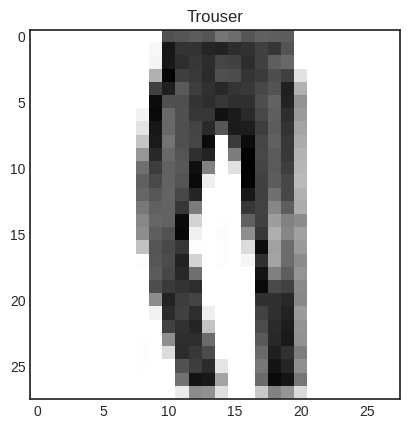

In [21]:
# 1차 예측 결과 출력
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [17]:
# plot_image : 이미지와 레이블 함께 출력하는 함수 정의
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [18]:
# plot_class : 10개 분류 중 어떤 클래스를 얼만큼의 확률로 예측 했는지 출력 하는 함수 정의
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

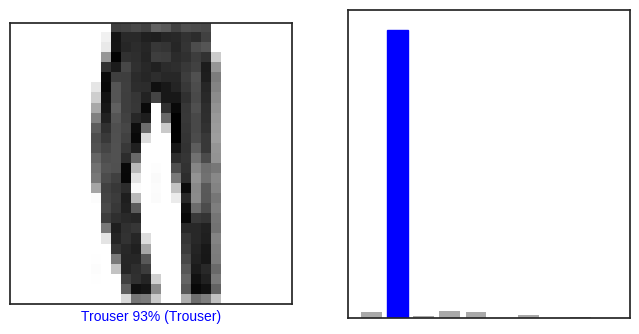

In [24]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

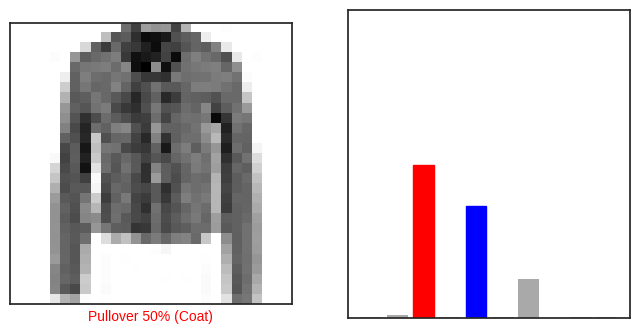

In [25]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

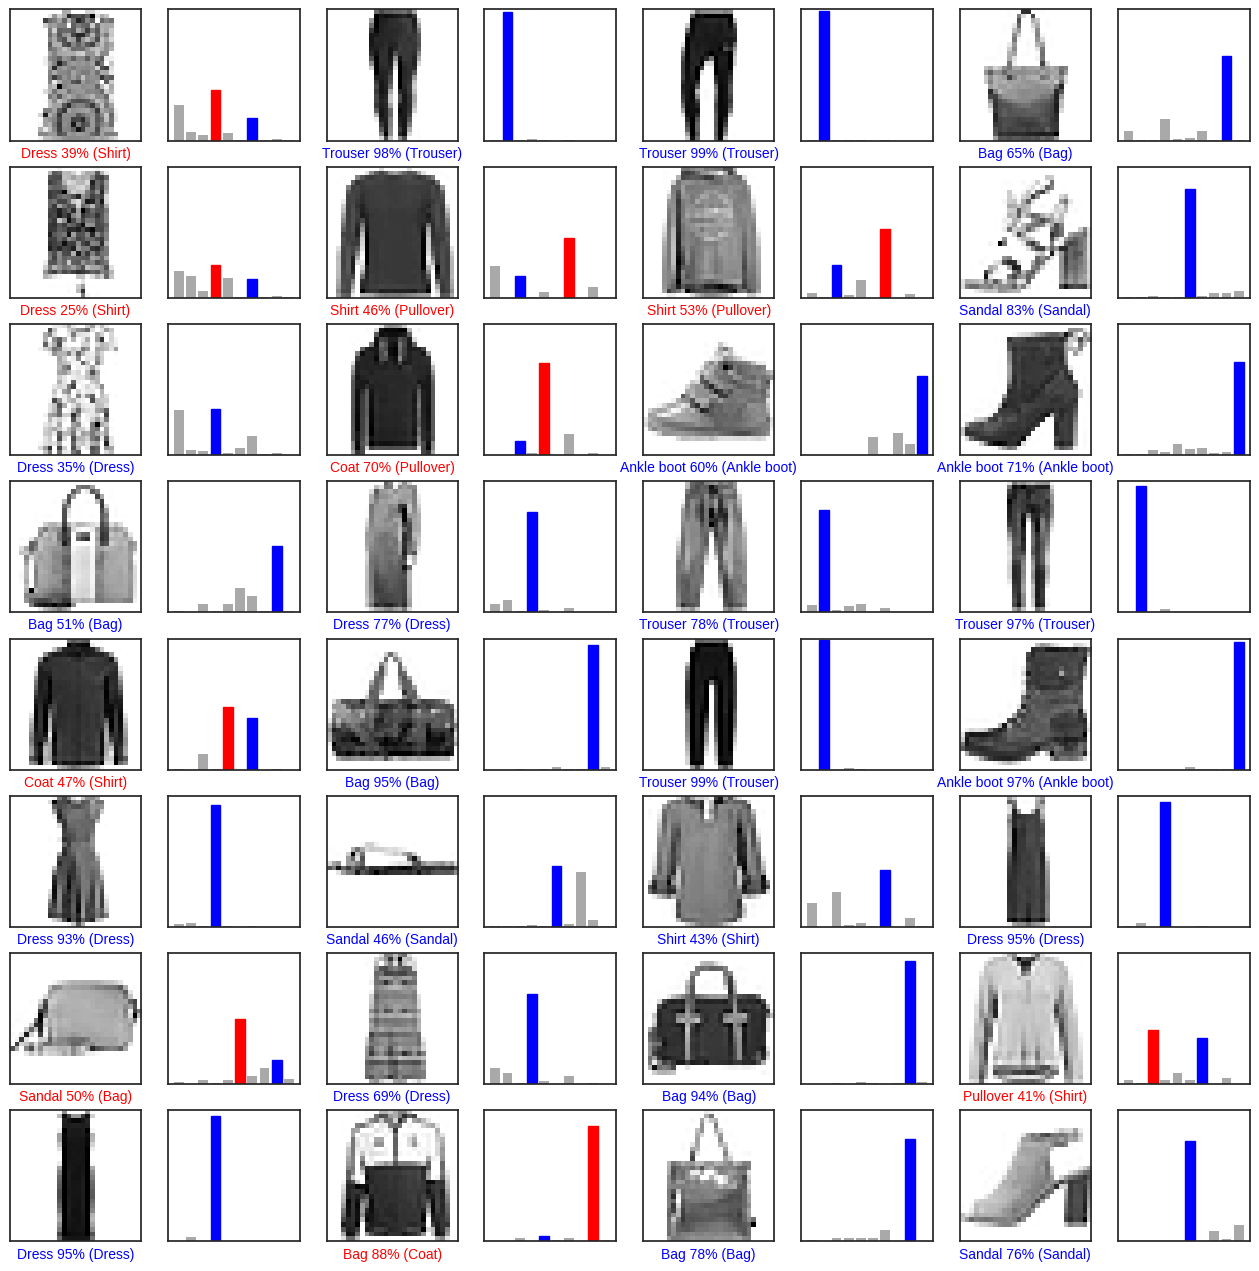

In [26]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [19]:
## 10개 분류에 대한 평가 테이블
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.74      0.79      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.71      0.60      0.65      1000
       Dress       0.76      0.84      0.80      1000
        Coat       0.61      0.77      0.68      1000
      Sandal       0.84      0.83      0.83      1000
       Shirt       0.48      0.35      0.41      1000
     Sneaker       0.83      0.86      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.89      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.77      0.78      0.77     10000
weighted avg       0.77      0.78      0.77     10000



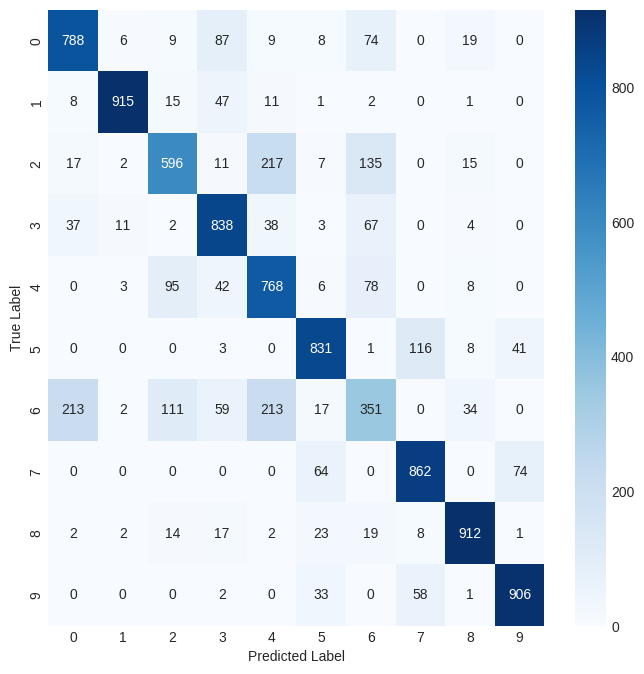

In [20]:
# 혼동 행렬 시각확
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 모델 최적화

### Early Stopping
 - fashion_mnist_model : 학습 진행 중 가장 좋은 모델 저장
 - 콜백 함수 = ModelCheckPoint

In [21]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5',
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7882 - loss: 0.6099

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.7882 - loss: 0.6099 - val_accuracy: 0.7981 - val_loss: 0.5888
Epoch 2/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7988 - loss: 0.5774

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7988 - loss: 0.5774 - val_accuracy: 0.8051 - val_loss: 0.5621
Epoch 3/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8126 - loss: 0.5436

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8126 - loss: 0.5436 - val_accuracy: 0.8082 - val_loss: 0.5490
Epoch 4/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8173 - loss: 0.5308

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8172 - loss: 0.5308 - val_accuracy: 0.8159 - val_loss: 0.5334
Epoch 5/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8192 - loss: 0.5198

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8192 - loss: 0.5198 - val_accuracy: 0.8160 - val_loss: 0.5224
Epoch 6/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8219 - loss: 0.5089

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8219 - loss: 0.5089 - val_accuracy: 0.8242 - val_loss: 0.5110
Epoch 7/60
1302/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8237 - loss: 0.5042

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8237 - loss: 0.5041 - val_accuracy: 0.8255 - val_loss: 0.5031
Epoch 8/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.4888

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8292 - loss: 0.4888 - val_accuracy: 0.8282 - val_loss: 0.4964
Epoch 9/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8269 - loss: 0.4911

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8269 - loss: 0.4910 - val_accuracy: 0.8288 - val_loss: 0.4908
Epoch 10/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8355 - loss: 0.4727

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8355 - loss: 0.4727 - val_accuracy: 0.8330 - val_loss: 0.4834
Epoch 11/60
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8386 - loss: 0.4645

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8386 - loss: 0.4645 - val_accuracy: 0.8302 - val_loss: 0.4823
Epoch 12/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8394 - loss: 0.4621

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8394 - loss: 0.4621 - val_accuracy: 0.8333 - val_loss: 0.4761
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8382 - loss: 0.4573 - val_accuracy: 0.8322 - val_loss: 0.4771
Epoch 14/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8411 - loss: 0.4548

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8411 - loss: 0.4548 - val_accuracy: 0.8404 - val_loss: 0.4656
Epoch 15/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8416 - loss: 0.4538

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8416 - loss: 0.4538 - val_accuracy: 0.8407 - val_loss: 0.4641
Epoch 16/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8423 - loss: 0.4438 - val_accuracy: 0.8367 - val_loss: 0.4696
Epoch 17/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8442 - loss: 0.4401

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8442 - loss: 0.4401 - val_accuracy: 0.8437 - val_loss: 0.4570
Epoch 18/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8451 - loss: 0.4439

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8451 - loss: 0.4439 - val_accuracy: 0.8435 - val_loss: 0.4551
Epoch 19/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8475 - loss: 0.4330

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8475 - loss: 0.4330 - val_accuracy: 0.8429 - val_loss: 0.4537
Epoch 20/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8464 - loss: 0.4302

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8464 - loss: 0.4302 - val_accuracy: 0.8448 - val_loss: 0.4498
Epoch 21/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8488 - loss: 0.4321

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8488 - loss: 0.4321 - val_accuracy: 0.8460 - val_loss: 0.4472
Epoch 22/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8501 - loss: 0.4327

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8501 - loss: 0.4327 - val_accuracy: 0.8467 - val_loss: 0.4455
Epoch 23/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8498 - loss: 0.4272

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8498 - loss: 0.4272 - val_accuracy: 0.8458 - val_loss: 0.4445
Epoch 24/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8478 - loss: 0.4291 - val_accuracy: 0.8460 - val_loss: 0.4465
Epoch 25/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8517 - loss: 0.4215

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8517 - loss: 0.4215 - val_accuracy: 0.8478 - val_loss: 0.4416
Epoch 26/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8496 - loss: 0.4271 - val_accuracy: 0.8429 - val_loss: 0.4494
Epoch 27/60
1306/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8508 - loss: 0.4190

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8508 - loss: 0.4190 - val_accuracy: 0.8499 - val_loss: 0.4375
Epoch 28/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8559 - loss: 0.4134 - val_accuracy: 0.8478 - val_loss: 0.4391
Epoch 29/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8525 - loss: 0.4127

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8525 - loss: 0.4127 - val_accuracy: 0.8482 - val_loss: 0.4363
Epoch 30/60
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8559 - loss: 0.4064

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8559 - loss: 0.4064 - val_accuracy: 0.8520 - val_loss: 0.4343
Epoch 31/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8542 - loss: 0.4132

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8542 - loss: 0.4132 - val_accuracy: 0.8518 - val_loss: 0.4329
Epoch 32/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8577 - loss: 0.4050

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8577 - loss: 0.4050 - val_accuracy: 0.8522 - val_loss: 0.4286
Epoch 33/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8597 - loss: 0.4007 - val_accuracy: 0.8494 - val_loss: 0.4315
Epoch 34/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8567 - loss: 0.4078

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8567 - loss: 0.4078 - val_accuracy: 0.8533 - val_loss: 0.4277
Epoch 35/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8555 - loss: 0.4096 - val_accuracy: 0.8489 - val_loss: 0.4334
Epoch 36/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8601 - loss: 0.3971

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8601 - loss: 0.3971 - val_accuracy: 0.8533 - val_loss: 0.4272
Epoch 37/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8566 - loss: 0.3996

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8566 - loss: 0.3996 - val_accuracy: 0.8531 - val_loss: 0.4272
Epoch 38/60
1312/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8607 - loss: 0.4005

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8607 - loss: 0.4005 - val_accuracy: 0.8541 - val_loss: 0.4243
Epoch 39/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8618 - loss: 0.3956 - val_accuracy: 0.8501 - val_loss: 0.4263
Epoch 40/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8585 - loss: 0.3987

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8585 - loss: 0.3987 - val_accuracy: 0.8541 - val_loss: 0.4231
Epoch 41/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8591 - loss: 0.3986

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8591 - loss: 0.3986 - val_accuracy: 0.8558 - val_loss: 0.4204
Epoch 42/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8630 - loss: 0.3877 - val_accuracy: 0.8539 - val_loss: 0.4207
Epoch 43/60
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.3921

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8600 - loss: 0.3921 - val_accuracy: 0.8562 - val_loss: 0.4180
Epoch 44/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8596 - loss: 0.3903 - val_accuracy: 0.8538 - val_loss: 0.4180
Epoch 45/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8610 - loss: 0.3898 - val_accuracy: 0.8539 - val_loss: 0.4201
Epoch 46/60
1300/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8645 - loss: 0.3872

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8645 - loss: 0.3872 - val_accuracy: 0.8563 - val_loss: 0.4170
Epoch 47/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8615 - loss: 0.3877 - val_accuracy: 0.8539 - val_loss: 0.4171
Epoch 48/60
1304/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.3781

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8655 - loss: 0.3782 - val_accuracy: 0.8568 - val_loss: 0.4146
Epoch 49/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8616 - loss: 0.3883

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8616 - loss: 0.3883 - val_accuracy: 0.8568 - val_loss: 0.4136
Epoch 50/60
1305/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.3821

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8633 - loss: 0.3822 - val_accuracy: 0.8558 - val_loss: 0.4125
Epoch 51/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8633 - loss: 0.3839 - val_accuracy: 0.8558 - val_loss: 0.4138
Epoch 52/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8658 - loss: 0.3793 - val_accuracy: 0.8571 - val_loss: 0.4138
Epoch 53/60
1309/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8649 - loss: 0.3806

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8650 - loss: 0.3806 - val_accuracy: 0.8573 - val_loss: 0.4096
Epoch 54/60
1307/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8650 - loss: 0.3794

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8650 - loss: 0.3794 - val_accuracy: 0.8594 - val_loss: 0.4082
Epoch 55/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8675 - loss: 0.3706 - val_accuracy: 0.8591 - val_loss: 0.4084
Epoch 56/60
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8657 - loss: 0.3789

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8657 - loss: 0.3789 - val_accuracy: 0.8601 - val_loss: 0.4080
Epoch 57/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8695 - loss: 0.3722 - val_accuracy: 0.8587 - val_loss: 0.4118
Epoch 58/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8677 - loss: 0.3731 - val_accuracy: 0.8554 - val_loss: 0.4131
Epoch 59/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8661 - loss: 0.3769 - val_accuracy: 0.8562 - val_loss: 0.4093
Epoch 60/60
1310/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8663 - loss: 0.3740

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8663 - loss: 0.3740 - val_accuracy: 0.8599 - val_loss: 0.4042


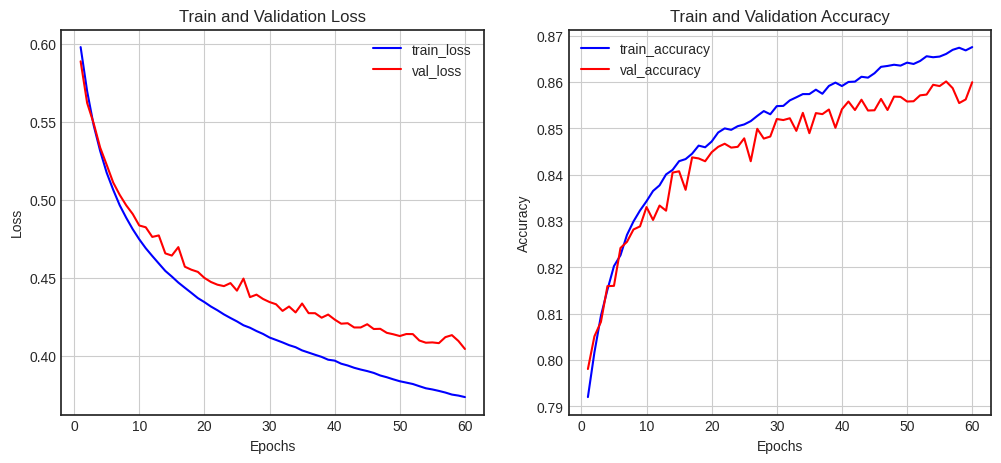

In [22]:
show_history(history)

In [23]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8520 - loss: 0.4198


[0.4238925874233246, 0.8464000225067139]

### 활성화 함수
 - 비선형 함수인 relu로 변경하여 학습 진행

In [32]:
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(784,)))                    # 입력층
model.add(layers.Dense(512, activation='relu'))          # 은닉층 (ReLU로 변경됨)
model.add(layers.Dense(10, activation='softmax'))        # 출력층 (소프트맥스 그대로 유지)

# 모델 요약 출력
model.summary()

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history2 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7777 - loss: 0.6255 - val_accuracy: 0.8253 - val_loss: 0.4819
Epoch 2/60
1303/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8592 - loss: 0.3836

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8592 - loss: 0.3835 - val_accuracy: 0.8696 - val_loss: 0.3627
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8757 - loss: 0.3369

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8757 - loss: 0.3369 - val_accuracy: 0.8724 - val_loss: 0.3561
Epoch 4/60
1291/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8847 - loss: 0.3086

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8847 - loss: 0.3086 - val_accuracy: 0.8817 - val_loss: 0.3354
Epoch 5/60
1296/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8955 - loss: 0.2848

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8955 - loss: 0.2849 - val_accuracy: 0.8786 - val_loss: 0.3298
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8994 - loss: 0.2672 - val_accuracy: 0.8815 - val_loss: 0.3436
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9025 - loss: 0.2586 - val_accuracy: 0.8833 - val_loss: 0.3328
Epoch 8/60
1292/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 0.2459

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9068 - loss: 0.2459 - val_accuracy: 0.8861 - val_loss: 0.3258
Epoch 9/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9121 - loss: 0.2341 - val_accuracy: 0.8813 - val_loss: 0.3500
Epoch 10/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9146 - loss: 0.2233 - val_accuracy: 0.8872 - val_loss: 0.3302
Epoch 11/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9176 - loss: 0.2193 - val_accuracy: 0.8901 - val_loss: 0.3276
Epoch 12/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9221 - loss: 0.2065 - val_accuracy: 0.8837 - val_loss: 0.3448
Epoch 13/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9250 - loss: 0.1976 - val_accuracy: 0.8865 - val_loss: 0.3440
Epoch 14/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9267 - loss: 0.1924 - val_accuracy: 0.8940 - val_loss: 0.3272
Epoch 15/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9315 - loss: 0.1851 - val_a

In [24]:
## diff_history : 모델 학습 결과 비교 시각화
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

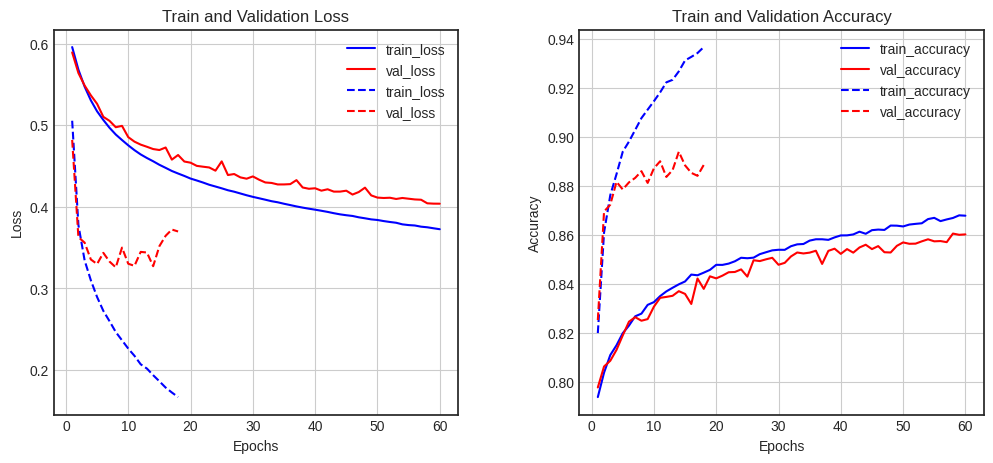

In [35]:
diff_history(history, history2)

In [37]:
## 활성화 함수 relu의 모델 평가 결과
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8785 - loss: 0.3405


[0.35012924671173096, 0.8755999803543091]

### 옵티마이져
- Adam 으로 변경

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.2351

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9120 - loss: 0.2351 - val_accuracy: 0.8919 - val_loss: 0.3186
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9140 - loss: 0.2279 - val_accuracy: 0.8856 - val_loss: 0.3348
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9187 - loss: 0.2127 - val_accuracy: 0.8823 - val_loss: 0.3420
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9229 - loss: 0.2040 - val_accuracy: 0.8942 - val_loss: 0.3188
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9245 - loss: 0.1995 - val_accuracy: 0.8921 - val_loss: 0.3371
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9266 - loss: 0.1930 - val_accuracy: 0.8743 - val_loss: 0.3769
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9320 - loss: 0.1819 - val_accuracy: 0.8881 - val_loss: 0.3423
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9311 - loss: 0.1802 - val_accurac

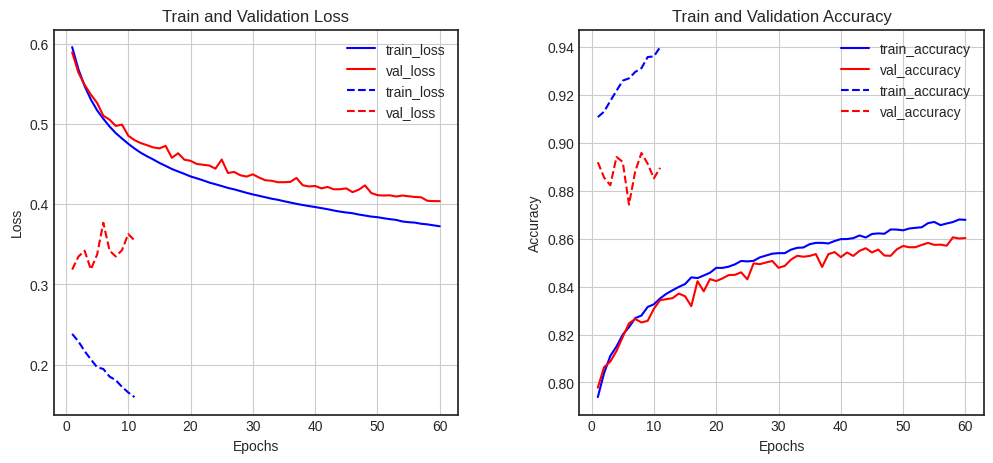

In [40]:
diff_history(history, history3)

- 기존 모델 학습 결과와 옵티마이저를 바꾼 모델의 학습 결과를 살펴보면, 학습이 빠르게 진행되어 조기에 종료되는 것을 알 수 있습니다. 다만, 과대적합이 발생하는 것을 알 수 있습니다.

In [41]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8814 - loss: 0.3388


[0.33827444911003113, 0.8823999762535095]

### 규제
- L2 규제 적용

In [43]:
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(784,)))                    # 입력층
model.add(layers.Dense(512,kernel_regularizer='l2', activation='relu'))          # 은닉층 (ReLU로 변경됨) # L2 규제 적용
model.add(layers.Dense(10, kernel_regularizer='l2', activation='softmax'))        # 출력층 (소프트맥스 그대로 유지)

# 모델 요약 출력
model.summary()

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history4 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7484 - loss: 2.0367 - val_accuracy: 0.7633 - val_loss: 0.8924
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7848 - loss: 0.8786 - val_accuracy: 0.7602 - val_loss: 0.9310
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7876 - loss: 0.8704 - val_accuracy: 0.7877 - val_loss: 0.8507
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7969 - loss: 0.8466 - val_accuracy: 0.7861 - val_loss: 0.8759
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7973 - loss: 0.8458 - val_accuracy: 0.7812 - val_loss: 0.8773
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7983 - loss: 0.8388 - val_accuracy: 0.7994 - val_loss: 0.8374
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8014 - loss: 0.8298 - val_accuracy: 0.8078 - val_loss: 0.8129
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8047 - loss: 0.8268 - 

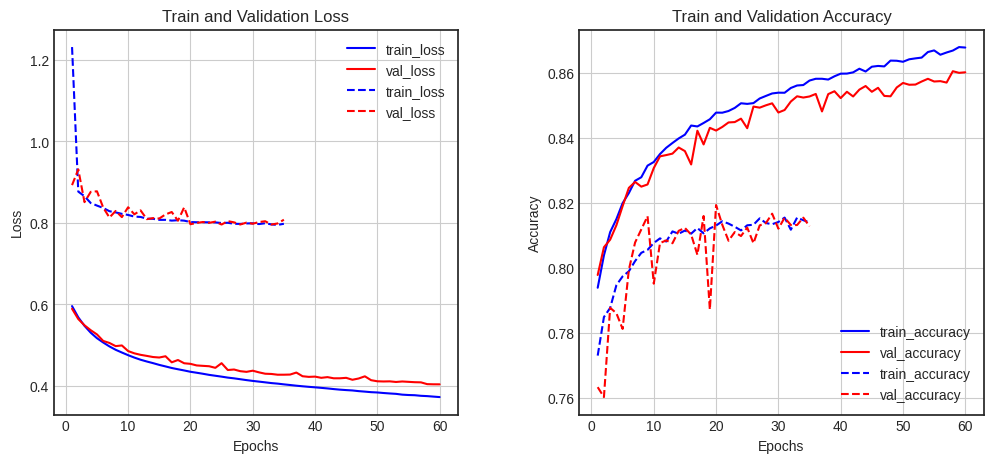

In [45]:
diff_history(history, history4)

In [46]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8063 - loss: 0.8063


[0.8090962171554565, 0.802299976348877]

- 기존 모델 학습 결과와 L2 규제 방법을 적용한 모델의 학습 결과를 살펴보면, 성능은 일부 저하되지만 어느정도 과대적합을 억제하는 것을 알 수 있습니다.

### 드롭아웃
- 모델에서 성능 저하를 최소화하면서 과대적합을 억제하기 위한 방법
- Dense 레이어 사이에 50%의 Dropout 레이어를 적용

In [47]:
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(784,)))                    # 입력층
model.add(layers.Dense(512,kernel_regularizer='l2', activation='relu'))          # 은닉층 (ReLU로 변경됨) # L2 규제 적용
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, kernel_regularizer='l2', activation='softmax'))        # 출력층 (소프트맥스 그대로 유지)

# 모델 요약 출력
model.summary()

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history5 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7103 - loss: 2.2528 - val_accuracy: 0.7742 - val_loss: 0.9512
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7568 - loss: 0.9861 - val_accuracy: 0.7893 - val_loss: 0.9120
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7521 - loss: 0.9872 - val_accuracy: 0.7996 - val_loss: 0.8986
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7554 - loss: 0.9749 - val_accuracy: 0.7854 - val_loss: 0.8956
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7564 - loss: 0.9713 - val_accuracy: 0.7902 - val_loss: 0.8882
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7578 - loss: 0.9606 - val_accuracy: 0.7901 - val_loss: 0.8977
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7614 - loss: 0.9571 - val_accuracy: 0.7959 - val_loss: 0.8950
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7649 - loss: 0.9587 - 

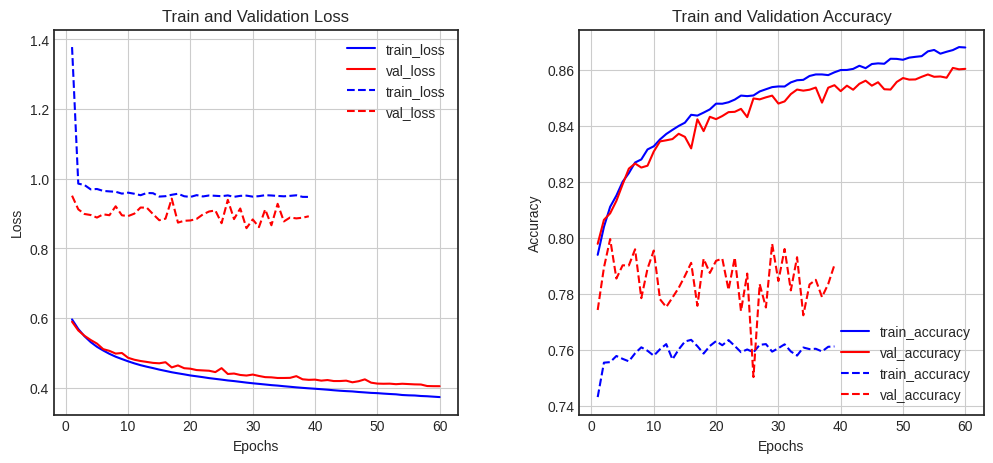

In [49]:
diff_history(history, history5)

In [52]:
model.evaluate(x_test, y_test) # accuracy: 0.7910 - loss: 0.8691
# LMS 노드 =  loss: 0.8857 - accuracy: 0.7831
# 동일 코드인데 결과가 왜 다를까?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7910 - loss: 0.8691


[0.871658980846405, 0.7871999740600586]

- 규제 방법 중에 L2 규제보다는 드롭아웃 방법이 더 좋은 결과를 보여주는 것을 알 수 있습니다.






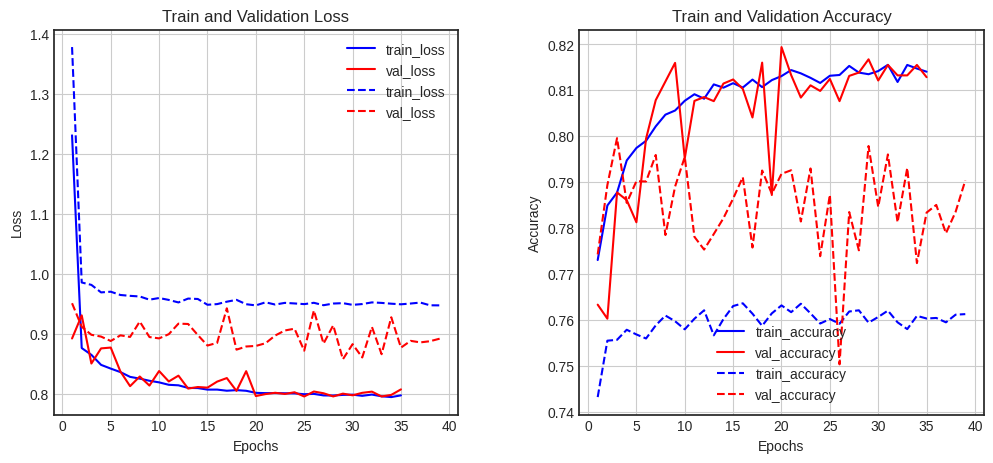

In [50]:
diff_history(history4, history5)

### 배치 정규화
- Dense 레이어 다음에 BatchNormalization 레이어를 추가하고, 이후 활성화 함수 Activation 레이어를 추가합니다.

In [54]:
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층

# 은닉층: Dense -> BatchNorm -> Activation -> Dropout
model.add(layers.Dense(512, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 출력층: Dense -> Softmax (활성화 함수 포함)
model.add(layers.Dense(10,  kernel_regularizer='l2'))
model.add(layers.Activation('softmax'))

# 모델 요약 출력
model.summary()

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [55]:
history6 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7427 - loss: 2.6590 - val_accuracy: 0.7614 - val_loss: 0.9911
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7753 - loss: 0.9300 - val_accuracy: 0.7636 - val_loss: 0.8982
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7771 - loss: 0.9214 - val_accuracy: 0.7683 - val_loss: 0.9509
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7743 - loss: 0.9354 - val_accuracy: 0.7851 - val_loss: 0.9226
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7735 - loss: 0.9298 - val_accuracy: 0.7336 - val_loss: 1.0075
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7793 - loss: 0.9145 - val_accuracy: 0.7158 - val_loss: 1.0844
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7761 - loss: 0.9345 - val_accuracy: 0.7542 - val_loss: 0.9547
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7762 - loss: 0.9211 - 

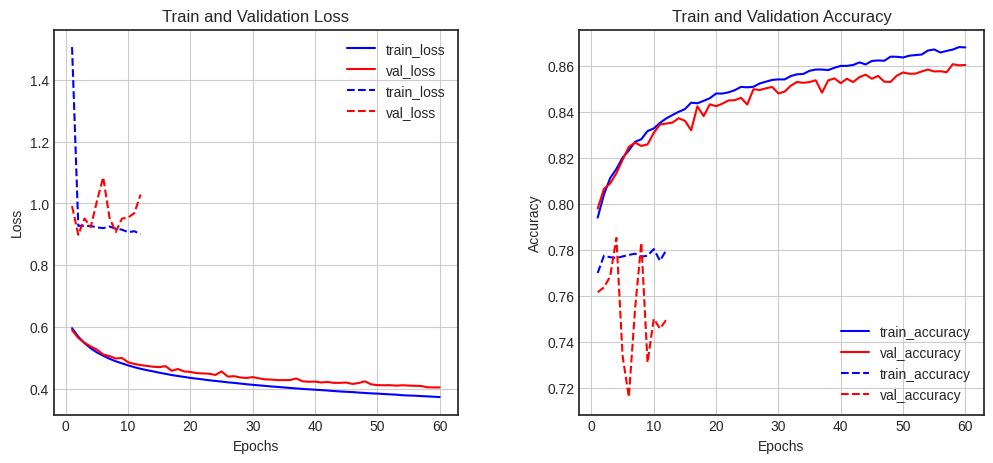

In [56]:
diff_history(history, history6)

In [57]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7555 - loss: 0.9161


[0.9161286354064941, 0.7544999718666077]

### 배치 정규화 + 드롭아웃

In [25]:
# 모델 정의
model = models.Sequential()
model.add(layers.Input(shape=(784,)))  # 입력층

# 은닉층: Dense -> BatchNorm -> Activation -> Dropout
model.add(layers.Dense(512, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 출력층: Dense -> Softmax (활성화 함수 포함)
model.add(layers.Dense(10,  kernel_regularizer='l2'))
model.add(layers.Activation('softmax'))

# 모델 요약 출력
model.summary()

# 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 409,098 (1.56 MB)

 Trainable params: 408,074 (1.56 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [26]:
history7 = model.fit(x_train, y_train,
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7488 - loss: 2.6313 - val_accuracy: 0.7783 - val_loss: 0.9292
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7786 - loss: 0.9270 - val_accuracy: 0.7917 - val_loss: 0.8988
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7766 - loss: 0.9339 - val_accuracy: 0.7356 - val_loss: 1.0242
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.7743 - loss: 0.9305 - val_accuracy: 0.7406 - val_loss: 0.9633
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7743 - loss: 0.9205 - val_accuracy: 0.7881 - val_loss: 0.9616
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7719 - loss: 0.9260 - val_accuracy: 0.7186 - val_loss: 1.0233
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7754 - loss: 0.9261 - val_accuracy: 0.7598 - val_loss: 0.9490
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7775 -

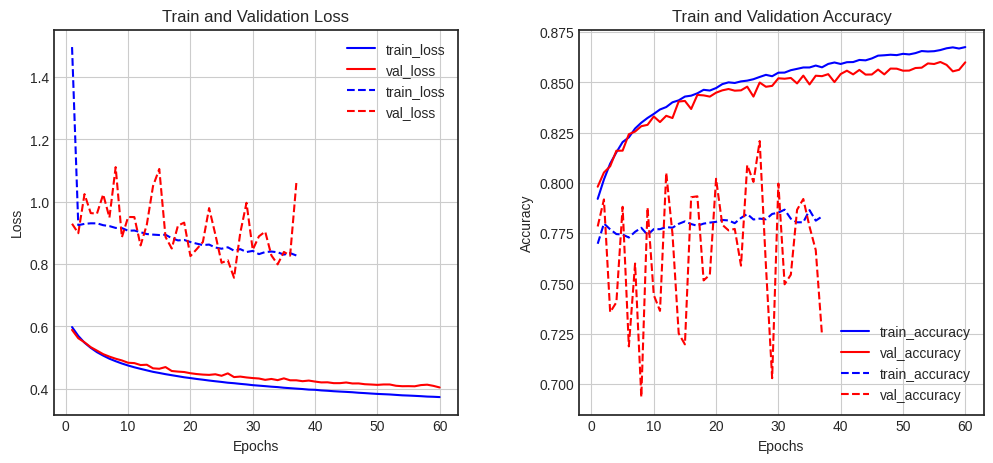

In [27]:
diff_history(history, history7)

In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8154 - loss: 0.7657


[0.7699952125549316, 0.8141999840736389]

### 모델 결과 분석

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


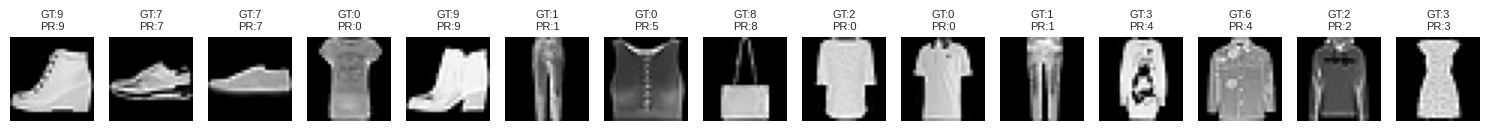

In [29]:
# 예측
predictions = model.predict(x_test)  # shape: (num_samples, 10)
predicted_labels = np.argmax(predictions, axis=1)

# 랜덤으로 15개 샘플 선택
random_indices = np.random.choice(len(x_test), 15, replace=False)
sample_images = x_test[random_indices]
sample_labels = y_test[random_indices]
sample_preds = predicted_labels[random_indices]

# 시각화
plt.figure(figsize=(15, 4))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 15, i+1)
    image = sample_images[i]

    if image.ndim == 1:  # (784,)인 경우 reshape
        image = image.reshape(28, 28)

    plt.imshow(image, cmap='gray')
    plt.title(f"GT:{sample_labels[i]}\nPR:{sample_preds[i]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [30]:
# 예측 결과
y_pred_probs = model.predict(x_test)  # shape: (num_samples, num_classes)
y_pred = np.argmax(y_pred_probs, axis=1)

# 실제 정답 레이블이 y_test에 있다고 가정
print(classification_report(y_test, y_pred, digits=4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0     0.8114    0.7530    0.7811      1000
           1     0.9620    0.9620    0.9620      1000
           2     0.6743    0.7970    0.7305      1000
           3     0.7391    0.9010    0.8121      1000
           4     0.7178    0.7250    0.7214      1000
           5     0.8288    0.9100    0.8675      1000
           6     0.7264    0.3930    0.5101      1000
           7     0.9068    0.8370    0.8705      1000
           8     0.9165    0.9220    0.9192      1000
           9     0.8618    0.9420    0.9001      1000

    accuracy                         0.8142     10000
   macro avg     0.8145    0.8142    0.8075     10000
weighted avg     0.8145    0.8142    0.8075     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


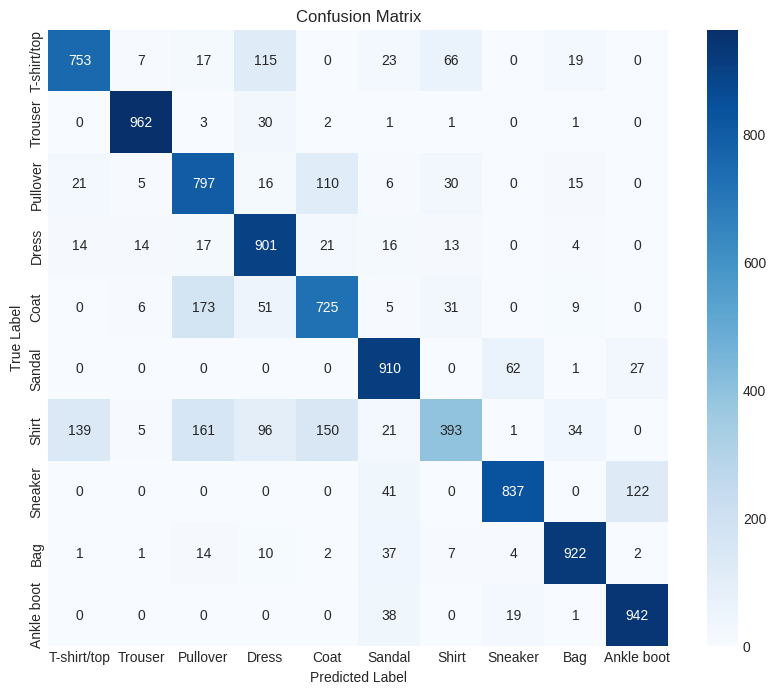

In [31]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- 모델 성능을 높이기 위해 시도한 것
  - L2 규제를 통해 가중치 업데이트 제한
  - 옵티마이저로는 RMSprop 계열과 Adagrad 계열의 장점을 차용한 Adam을 사용
  - 드롭아웃 레이어와 배치정규화 레이어 추가